# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [1]:
# Import the appropriate libraries
import pandas as pd
import numpy as np

# Create two new dataframes
north_df = pd.read_csv("NorthCallCenter.csv")
south_df = pd.read_csv("SouthCallCenter.csv")

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, make sure you answer the following questions:

1. How many reps are in each branch?
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
3. What is the number of calls taken for each time block?

In [2]:
north_df.nunique()

Unnamed: 0               245
Branch                     1
Call Purpose               3
Time Block                 9
Incoming or Outgoing       2
Queue                      2
Rep ID                     9
Sale                       3
Lost Call                  2
Abandoned                  2
Busy Minutes               5
Not Ready Minutes          3
Incoming Wait Time         5
During Call Wait Time      3
Calls                      1
dtype: int64

In [3]:
south_df.nunique()

Unnamed: 0               314
Branch                     1
Call Purpose               3
Time Block                 9
Incoming or Outgoing       2
Queue                      2
Rep ID                    11
Sale                       2
Lost Call                  2
Abandoned                  2
Busy Minutes               5
Not Ready Minutes          3
Incoming Wait Time         5
During Call Wait Time      3
Calls                      1
dtype: int64

In [4]:
# Put your EDA code here
#north_df.head()
print('Number of Reps in North Branch : ',north_df.value_counts(['Rep ID']).count())
print('Number of Reps in South Branch : ',south_df.value_counts(['Rep ID']).count())
# north_df.nunique()
# north_df.nunique()
# north_df['Rep ID'].describe()  #9 Reps
# north_df.describe()

Number of Reps in North Branch :  9
Number of Reps in South Branch :  11


In [5]:
print('NORTH BRANCH AVERAGE CALL MINUTES:\n',north_df[['Busy Minutes','Not Ready Minutes','Incoming Wait Time','During Call Wait Time']].mean())
print('SOUTH BRANCH AVERAGE CALL MINUTES:\n',south_df[['Busy Minutes','Not Ready Minutes','Incoming Wait Time','During Call Wait Time']].mean())

NORTH BRANCH AVERAGE CALL MINUTES:
 Busy Minutes             9.987755
Not Ready Minutes        1.914286
Incoming Wait Time       3.048780
During Call Wait Time    2.967347
dtype: float64
SOUTH BRANCH AVERAGE CALL MINUTES:
 Busy Minutes             10.054140
Not Ready Minutes         1.910828
Incoming Wait Time        3.000000
During Call Wait Time     3.076433
dtype: float64


In [6]:
print('NORTH BRANCH: Calls taken in each time block\n',north_df['Time Block'].value_counts())
print('SOUTH BRANCH: Calls taken in each time block\n',south_df['Time Block'].value_counts())

NORTH BRANCH: Calls taken in each time block
 12:00 PM    45
10:00 AM    43
2:00 PM     35
3:00 PM     30
4:00 PM     28
11:00 AM    25
1:00 PM     17
5:00 PM     17
9:00 AM      5
Name: Time Block, dtype: int64
SOUTH BRANCH: Calls taken in each time block
 12:00 PM    75
10:00 AM    56
3:00 PM     43
11:00 AM    31
2:00 PM     30
5:00 PM     26
4:00 PM     25
1:00 PM     23
9:00 AM      5
Name: Time Block, dtype: int64


In [7]:
# n1 = north_df['Incoming or Outgoing'].value_counts()
# Just checking something here
north_df.groupby(['Incoming or Outgoing']).sum()


,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Incoming or Outgoing,,,,,,,,
Incoming,3321,1,3,810,159,250.0,247,82
Outgoing,26569,4,4,1637,310,0.0,480,163


In [8]:
north_df.columns

Index(['Unnamed: 0', 'Branch', 'Call Purpose', 'Time Block',
       'Incoming or Outgoing', 'Queue', 'Rep ID', 'Sale', 'Lost Call',
       'Abandoned', 'Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time',
       'During Call Wait Time', 'Calls'],
      dtype='object')

In [9]:
north_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             245 non-null    int64  
 1   Branch                 245 non-null    object 
 2   Call Purpose           245 non-null    object 
 3   Time Block             245 non-null    object 
 4   Incoming or Outgoing   245 non-null    object 
 5   Queue                  245 non-null    object 
 6   Rep ID                 245 non-null    object 
 7   Sale                   245 non-null    object 
 8   Lost Call              245 non-null    int64  
 9   Abandoned              245 non-null    int64  
 10  Busy Minutes           245 non-null    int64  
 11  Not Ready Minutes      245 non-null    int64  
 12  Incoming Wait Time     82 non-null     float64
 13  During Call Wait Time  245 non-null    int64  
 14  Calls                  245 non-null    int64  
dtypes: flo

### EDA Results

Make note of your results here!

1. How many reps are in each branch?
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
3. What is the number of calls taken for each time block?

###  Reps Count
There are 9 reps in North and 11 Reps in South Branch
### Average Minutes
a) The average busy minutes and during call wait time seem more in South Branch than North  
b) While the avg. Not Ready minutes and Incoming Call time is slightly higher in North Branch  
### North Branch Average Minutes Data:  
Busy Minutes             9.987755  
Not Ready Minutes        1.914286  
Incoming Wait Time       3.048780  
During Call Wait Time    2.967347  

### South Branch Average Minutes Data:  
Busy Minutes             10.054140  
Not Ready Minutes         1.910828  
Incoming Wait Time        3.000000  
During Call Wait Time     3.076433  

### North Branch: Calls taken in each time block
12:00 PM    45  
10:00 AM    43  
2:00 PM     35  
3:00 PM     30  
4:00 PM     28  
11:00 AM    25  
1:00 PM     17  
5:00 PM     17  
9:00 AM      5  
### South Branch: Calls taken in each time block
12:00 PM    75</br>
10:00 AM    56</br>
3:00 PM     43</br>
11:00 AM    31</br>
2:00 PM     30</br>
5:00 PM     26</br>
4:00 PM     25</br>
1:00 PM     23</br>
9:00 AM      5</br>


## Cleaning Data

Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets:

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [18]:
# Check if Incoming Wait TIme is Null only for Outgoing Calls
north_df.loc[(north_df['Incoming or Outgoing']=='Outgoing')][['Incoming or Outgoing', 'Incoming Wait Time']]

,Incoming or Outgoing,Incoming Wait Time
82,Outgoing,NaN
83,Outgoing,NaN
84,Outgoing,NaN
85,Outgoing,NaN
86,Outgoing,NaN
...,...,...
240,Outgoing,NaN
241,Outgoing,NaN
242,Outgoing,NaN
243,Outgoing,NaN


In [19]:
# Check if Incoming Wait TIme is Null only for Outgoing Calls
south_df.loc[(south_df['Incoming or Outgoing']=='Outgoing')][['Incoming or Outgoing', 'Incoming Wait Time']]

,Incoming or Outgoing,Incoming Wait Time
126,Outgoing,NaN
127,Outgoing,NaN
128,Outgoing,NaN
129,Outgoing,NaN
130,Outgoing,NaN
...,...,...
309,Outgoing,NaN
310,Outgoing,NaN
311,Outgoing,NaN
312,Outgoing,NaN


In [59]:
# Strip the extra spaces in Sale column for 'YES ' so that there are 2 unique values - YES & NO
north_df['Sale'] = north_df['Sale'].str.strip()
north_df['Sale'].value_counts()

NO     234
YES     11
Name: Sale, dtype: int64

In [60]:
# Clean your data here
north_df_duplicates = north_df[north_df.duplicated()]
north_df_duplicates

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls


In [61]:
south_df_duplicates = south_df[south_df.duplicated()]
south_df_duplicates

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls


In [15]:
# The SALE column in the dataset looks unncessary, so I am dropping it.
north_df.drop(columns=['Sale'], inplace=True)
south_df.drop(columns=['Sale'], inplace=True)

In [17]:
# north_df.head()
south_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,0,0,8,3,1.0,3,1


### Cleaning Data Results

Make note of your results!

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

## Data Manipulation

Before you begin answering any questions, combine the two datasets together to create a third dataframe called `df`. You can use this third dataframe to compare the two call centers to company-wide trends.

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

In [20]:
# Combine North and South Branches to a new dataset
company_df = north_df.append(south_df, ignore_index=True)
company_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,0,0,8,2,1.0,4,1


In [21]:
# 1- Group by Rep ID,sum the resulting structure.
# Sort by calls to determine which rep in each branch has the highest number of calls.
reps_group = company_df.groupby(['Branch','Rep ID']).sum()
# reps_group.sort_values(['Branch','Calls'],ascending=False)
# Can also use below to sort by Branch in asc order and then Calls in desc order
reps_group.sort_values(['Branch','Calls'],ascending=[1,0])

Unnamed: 0  Lost Call  Abandoned  Busy Minutes  \
Branch Rep ID                                                   
North  Brent         4840          0          1           362   
       Lilly         3375          0          2           307   
       Duke          2999          2          0           292   
       Todd          4252          1          0           296   
       Joe           3178          0          0           256   
       Cam           2746          1          0           233   
       Xander        3340          1          0           244   
       Amanda        2666          0          1           229   
       Andy          2494          0          3           228   
South  Eric          5039          0          0           361   
       Randy         4576          3          1           320   
       Sandy         4694          1          0           325   
       Helga         5236          0          2           292   
       George        4620          0          0           298   
       Kate          4615          0          0           291   
       Karl          4532          1          0           287   
       Josh          3960          3          0           260   
       Susan         4006          2          0           267   
       Sharon        4226          1          1           257   
       Alice         3637          0          0           199   

               Not Ready Minutes  Incoming Wait Time  During Call Wait Time  \
Branch Rep ID                                                                 
North  Brent                  71                17.0                    117   
       Lilly                  59                37.0                     88   
       Duke                   56                39.0                     85   
       Todd                   58                21.0                     97   
       Joe                    49                36.0                     81   
       Cam                    46                32.0                     66   
       Xander                 44                20.0                     68   
       Amanda                 43                12.0                     60   
       Andy                   43                36.0                     65   
South  Eric                   54                47.0                    112   
       Randy                  66                47.0                     98   
       Sandy                  60                34.0                    100   
       Helga                  58                36.0                     95   
       George                 53                41.0                     87   
       Kate                   61                37.0                     83   
       Karl                   61                26.0                     85   
       Josh                   50                31.0                     83   
       Susan                  53                35.0                     88   
       Sharon                 38                29.0                     77   
       Alice                  46                15.0                     58   

               Calls  
Branch Rep ID         
North  Brent      37  
       Lilly      30  
       Duke       29  
       Todd       29  
       Joe        26  
       Cam        24  
       Xander     24  
       Amanda     23  
       Andy       23  
South  Eric       35  
       Randy      33  
       Sandy      32  
       Helga      31  
       George     29  
       Kate       29  
       Karl       28  
       Josh       26  
       Susan      26  
       Sharon     25  
       Alice      20

In [26]:
#2- Find Branch Wise Average Call Abandonment Time
comp_total_by_branch = company_df.groupby(['Branch']).sum()
# comp_total_by_branch
comp_total_by_branch['Avg Call Abandonment%'] = ((comp_total_by_branch['Abandoned']/comp_total_by_branch['Calls'])*100).round(2)
# comp_total_by_branch
comp_total_by_branch[['Abandoned','Calls','Avg Call Abandonment%']]


,Abandoned,Calls,Avg Call Abandonment%
Branch,,,
North,7,245,2.86
South,4,314,1.27


In [27]:
# Total Company Wide Average Call Abandonment Time
company_avgCallAbandonment = (comp_total_by_branch['Abandoned'].sum()/comp_total_by_branch['Calls'].sum())*100
company_avgCallAbandonment.round(2)


1.97

In [34]:
# 3- Service Level - percentage of calls answered within 2 seconds for each branch
# Part 3a finds total number of Imcoming Calls
# Part 3b finds total number of Incoming Calls answered withing 2 sec
# Part 3c takes the count from Part3b and divides by count from Part 3b to get percentage
# Part 3a Total Incoming Calls grouped by Branch
# Part 3a ----------------->
total_calls_in = company_df[company_df["Incoming or Outgoing"] == "Incoming"]
# total_calls_in
total_calls_in_branchwise = total_calls_in[['Branch','Calls']]
# total_calls_in_branchwise
total_branch_stats = total_calls_in_branchwise.groupby(["Branch"]).sum()
total_branch_stats
print('Total Incoming\n',total_branch_stats,'\nGrand Total', total_branch_stats['Calls'].sum())



Total Incoming
         Calls
Branch       
North      82
South     126 
Grand Total 208


In [36]:
# Part 3b-------------------->
# Service Level - percentage of calls answered within 2 seconds for each branch
quick_calls = company_df[company_df["Incoming Wait Time"] <= 2.0]
quick_calls
quick_branch = quick_calls[["Branch", "Calls"]]
quick_branch
quick_branch_stats = quick_branch.groupby(["Branch"]).sum()  # Final Table
quick_branch_stats
print('Total Incoming(<2s)\n',quick_branch_stats,'\nGrand Total', quick_branch_stats['Calls'].sum())

Total Incoming(<2s)
         Calls
Branch       
North      33
South      48 
Grand Total 81


In [40]:
# Part 3c ----------------------------------------------->
#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_branch_stats, total_branch_stats, on="Branch")
service_level
# Create Percentage Column in Table 3
service_level["Service Level %"] = (service_level["Calls_x"]/service_level["Calls_y"] * 100).round(2)
service_level
print('Service Level\n',service_level,'\nCompany Wide', quick_branch_stats['Calls'].sum(),'\t',total_branch_stats['Calls'].sum(),'\t', (quick_branch_stats['Calls'].sum()/total_branch_stats['Calls'].sum()*100).round(2))

Service Level
         Calls_x  Calls_y  Service Level %
Branch                                   
North        33       82            40.24
South        48      126            38.10 
Company Wide 81 	 208 	 38.94


In [41]:
# 4 - Average Speed of Answer
service_level_byBranch = company_df.groupby(['Branch'])["Incoming Wait Time"].mean()
print(service_level_byBranch,'\n','Company Wide',(company_df["Incoming Wait Time"].mean()))
# company_service_lvl = company_df["Incoming Wait Time"].mean()
# company_service_lvl

Branch
North    3.04878
South    3.00000
Name: Incoming Wait Time, dtype: float64 
 Company Wide 3.019230769230769


### Data Manipulation Results

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each company and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why.

1. What is the average abandonment rate per queue?
2. What is the service level and average speed of answer per each rep?
3. For each type of call purpose, how many calls are outgoing vs. incoming?

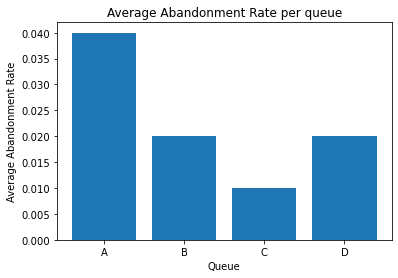

In [232]:
# Visualization for Average Abandonment Rate per queue

import matplotlib.pyplot as plt

abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = company_df.groupby("Queue").agg("sum")
queue_dict
for i in range(4):
    abandonment_rates[queues[i]] = (queue_dict["Abandoned"][i] / queue_dict["Calls"][i]).round(2) 

plt.bar(abandonment_rates.keys(),abandonment_rates.values())
plt.xlabel("Queue")
plt.ylabel("Average Abandonment Rate")
plt.title('Average Abandonment Rate per queue')
plt.show()

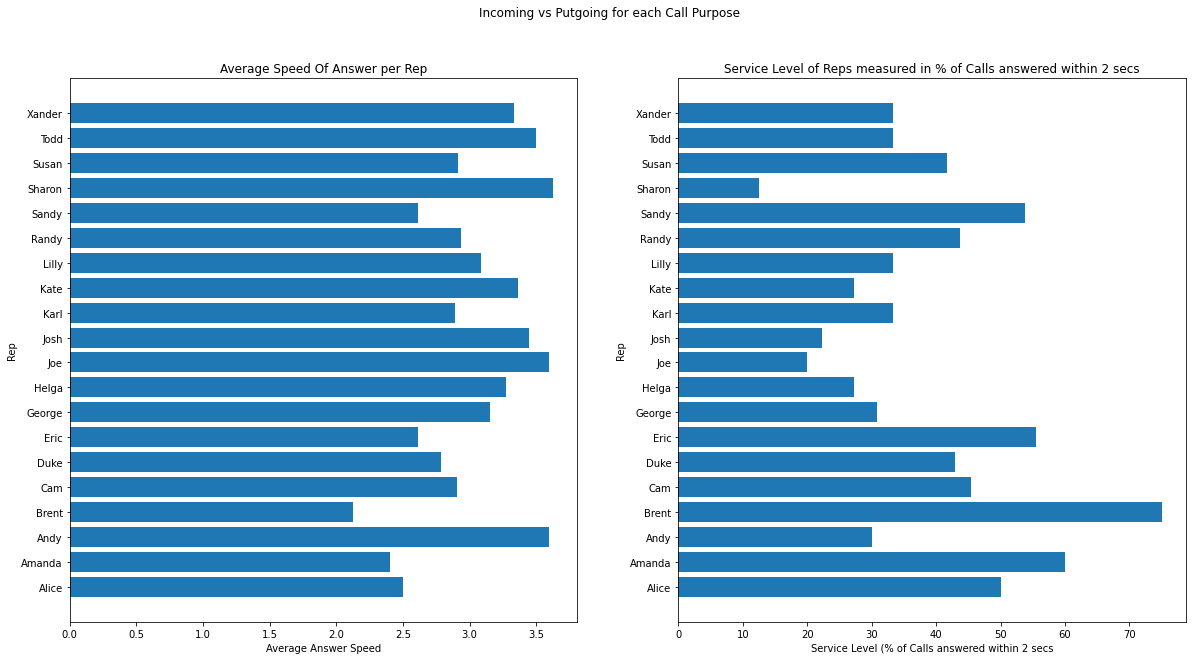

In [352]:
# Visualization for service level and average speed of answer per each rep

import seaborn as sns
import matplotlib.pyplot as plt

#  Find data for the average speed of answer of each rep
north_plt = company_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Figure Size - SubPlot
fig = plt.figure(figsize =(20, 10))
# SubPlot1
plt.subplot(1, 2, 1)
plt.barh(north_plt['Rep ID'],north_plt['Incoming Wait Time'])
plt.xlabel("Average Answer Speed")
plt.ylabel("Rep")
plt.title('Average Speed Of Answer per Rep')

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = company_df[company_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = company_df[company_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = (service_level["Calls_x"]/service_level["Calls_y"] * 100).round(2)
# SubPlot2
plt.subplot(1, 2, 2)
plt.barh(service_level.index,service_level['Service Level %'])
plt.xlabel("Service Level (% of Calls answered within 2 secs")
plt.ylabel("Rep")
plt.title('Service Level of Reps measured in % of Calls answered within 2 secs')

plt.show()


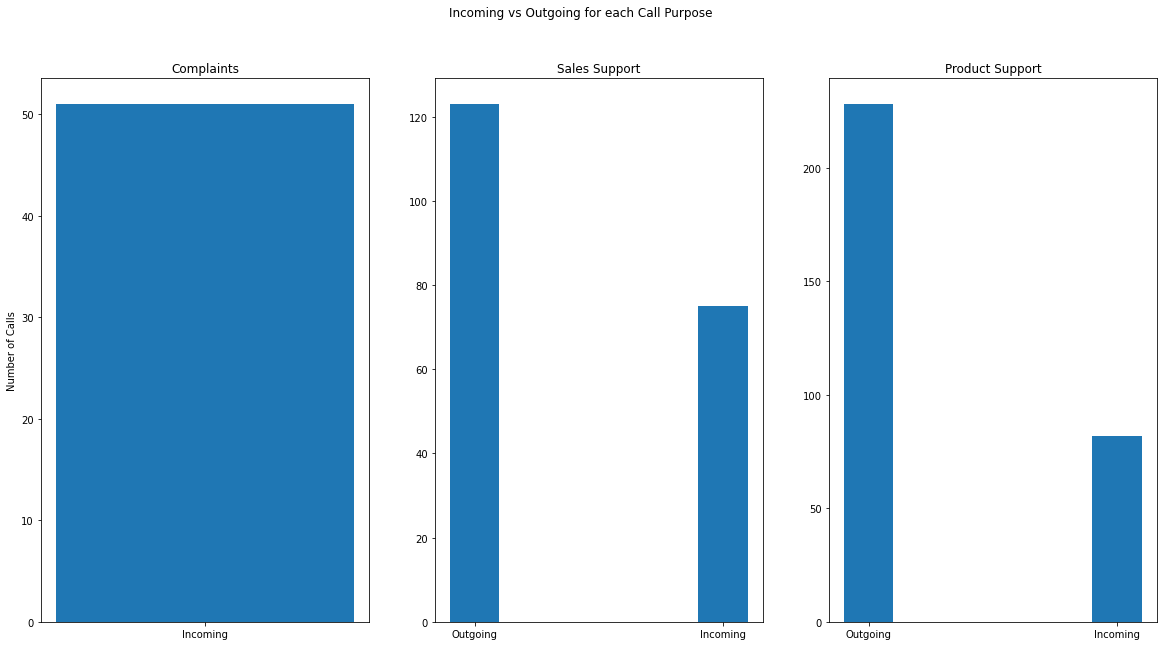

In [356]:
# Create visualization 3 here
# The three dictionaries, complaints, sales_support, and product_support, have the information you need
# purpose_group = company_df.groupby(['Call Purpose'])["Incoming or Outgoing"].value_counts()
purpose_group = company_df.groupby(['Call Purpose'])
purpose_group.head()
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
# purpose_counts
complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

# Figure Size - SubPlot
fig = plt.figure(figsize =(20, 10))
# SubPlot1
plt.subplot(1, 3, 1)
plt.bar(complaints.keys(),complaints.values(), width=0.05)
plt.xlabel("")
plt.ylabel("Number of Calls")
plt.title('Complaints')
# SubPlot1
plt.subplot(1, 3, 2)
plt.bar(sales_support.keys(),sales_support.values(), width=0.2)
plt.xlabel("")
plt.ylabel("")
plt.title('Sales Support')

# SubPlot3
plt.subplot(1, 3, 3)
plt.bar(product_support.keys(),product_support.values(), width=0.2)
plt.xlabel("")
plt.ylabel("")
plt.title('Product Support')
plt.suptitle("Incoming vs Outgoing for each Call Purpose")
plt.show()


In [390]:
# call_purpose = company_df[["Call Purpose", "Incoming or Outgoing", "Calls"]]
# g1 = call_purpose.groupby(['Call Purpose','Incoming or Outgoing']).sum()
# g1.plot.bar(stacked=True,title="PP",color=("orange", "cyan"))
# # import seaborn as sns
# # sns.barplot(x = g1['Call Purpose'],y = g1['Calls'],hue = g1['Incoming or Outgoing'],data = g1, palette = "Blues")
# # plt.title('Chart title')
# # plt.xlabel('X axis title')
# # plt.ylabel('Y axis title')  
# plt.show()

In [ ]:
I wanted to use Grouped or Stacked Bar Chart so that I have 1 graph with x-axis reflecting Call Purpose and  y-axis giving the actual 
Call count for Incoming and Outgoing, so that each Call purpose would have 2 bars or stack , one for Incoming and another for OUtgoing ,
all in the same graph. 
But since I could not figure that out, I decided to go with SubPlot where each plot reflects each Call Purpose.

In [357]:
# purpose_group = company_df.groupby(['Call Purpose'])
# purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
# purpose_counts.head()


Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: Incoming or Outgoing, dtype: int64

### Visualization Results

For each chart you created, explain why you chose the chart style you chose.

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.

1. Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?
2. Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?
3. Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

In [ ]:
1) Considering the KPIs, I think North Branch is operating slightly better when it comes to Avg speed of answer 
but South Branch is better with Avg. Abadonment rate and Service level.
 
2) Since North have only 9 reps compared to South(11), having more reps can help improve their abandonment rate and service level.

3) Maybe more information or analysis for Outgoing calls ?

## Submit Your Work

After you have completed your work on the assignment, push your work to your Github repo. Navigate to the repo, copy the link to your assignment and paste the URL in the Canvas assignment's submission box. 

## Bonus Mission

Create a visualization that answers this question:

1. For each call purpose, how many calls (incoming and outgoing) take place in each time block?

In [396]:
# Create your visualization here!
call_times = company_df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]
type(call_times)
g1 = call_times.groupby(['Call Purpose','Time Block','Incoming or Outgoing']).sum()
g1


# Use groupby and get_group to select which call purpose to plot:


Calls
Call Purpose    Time Block Incoming or Outgoing       
Complaint       10:00 AM   Incoming                  6
                11:00 AM   Incoming                  3
                12:00 PM   Incoming                 11
                1:00 PM    Incoming                  6
                2:00 PM    Incoming                  5
                3:00 PM    Incoming                  6
                4:00 PM    Incoming                  3
                5:00 PM    Incoming                  6
                9:00 AM    Incoming                  5
Product Support 10:00 AM   Incoming                  3
                           Outgoing                 17
                11:00 AM   Incoming                  7
                           Outgoing                 19
                12:00 PM   Incoming                  9
                           Outgoing                 51
                1:00 PM    Incoming                  2
                           Outgoing                 14
                2:00 PM    Incoming                 16
                           Outgoing                 34
                3:00 PM    Incoming                 23
                           Outgoing                 38
                4:00 PM    Incoming                 14
                           Outgoing                 26
                5:00 PM    Incoming                  8
                           Outgoing                 24
                9:00 AM    Outgoing                  5
Sales Support   10:00 AM   Incoming                 24
                           Outgoing                 49
                11:00 AM   Incoming                  9
                           Outgoing                 18
                12:00 PM   Incoming                 23
                           Outgoing                 26
                1:00 PM    Incoming                  7
                           Outgoing                 11
                2:00 PM    Incoming                  4
                           Outgoing                  6
                3:00 PM    Incoming                  3
                           Outgoing                  3
                4:00 PM    Incoming                  5
                           Outgoing                  5
                5:00 PM    Outgoing                  5